<a href="https://colab.research.google.com/github/Ritwick-Roy/deep-learning/blob/main/wind_speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Ritwick-Roy/deep-learning/main/datasets/wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
df['DATE']=pd.to_datetime(df['DATE'])
# df['YEAR']=df['DATE'].dt.year
# df['MONTH']=df['DATE'].dt.month
# df['DAY']=df['DATE'].dt.day
# df.drop(['DATE'],axis=1,inplace=True)

In [4]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [5]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [6]:
df.fillna(0, inplace=True)
df.isnull().sum().sum()

0

In [7]:
df.columns.shape

(9,)

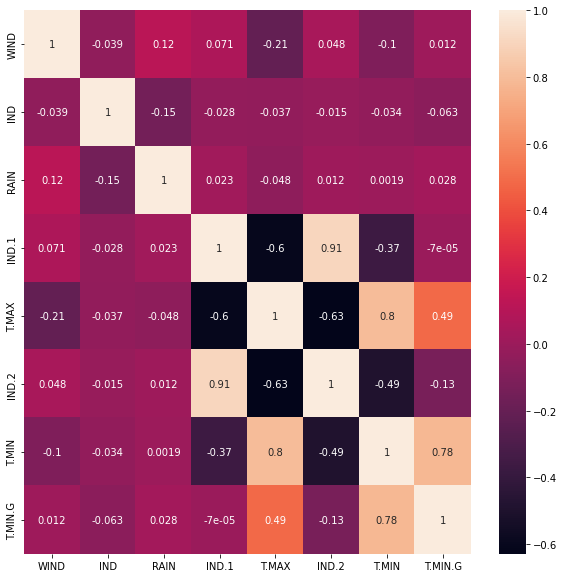

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

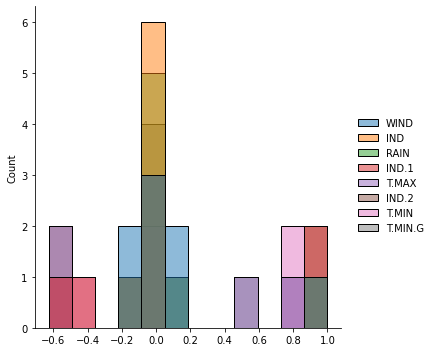

In [9]:
sns.displot(df.corr())

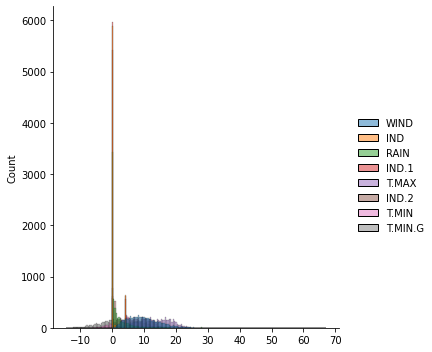

In [10]:
sns.displot(df)

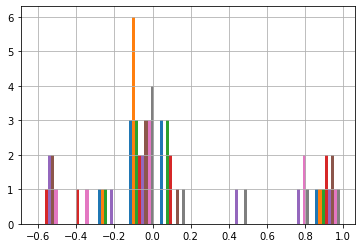

In [11]:
plt.hist(df.corr())
plt.grid(True)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [13]:
X = df.drop(['WIND','DATE'], axis=1)
y = df['WIND']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [15]:
model=keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[7]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [16]:
model.compile(
    optimizer='adam',
    loss='mse',
)

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [18]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

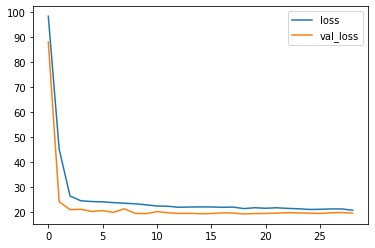

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [20]:
history_df = pd.DataFrame(history.history)
print(("Best Validation Loss: {:0.4f}%" +\
      "\nBest Validation Accuracy: {:0.4f}%")\
      .format(history_df['val_loss'].min(), 
              history_df['val_loss'].max()))

Best Validation Loss: 19.3718%
Best Validation Accuracy: 87.9964%
